In [2]:
import cv2
import numpy as np

img = cv2.imread("fileout.png")
small = cv2.resize(img, (0,0), fx=0.5, fy=0.5)

hsv = cv2.cvtColor(small, cv2.COLOR_BGR2HSV)
sensitivity = 5
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
mask = cv2.inRange(hsv, lower_white, upper_white)
res = cv2.bitwise_and(small,small, mask= mask)

# cv2.imshow('opencv_image',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [3]:
import math
#define something
WIDTH_PIX = 1576
LENGTH_PIX = 890

NW_lat_long =  [24.947246, 121.359039]
SE_lat_long = [24.938589, 121.375952]

def take_pix_from_location (a,b): #a = longitude, b =  latitude
    return [int((b - 24.938589)*LENGTH_PIX/(24.947246 - 24.938589)), int((a - 121.359039)*WIDTH_PIX/(121.375952 -121.359039))]

print(take_pix_from_location(121.364545,24.93999))
print(res[531,144])

[144, 513]
[0 0 0]


In [4]:
import matplotlib.path as mplPath
import matplotlib.pyplot as plt

points_path = mplPath.Path([(take_pix_from_location(121.3707682,24.9460277)),
                   (take_pix_from_location(121.3662299,24.9431871)),
                   (take_pix_from_location(121.3681503,24.9416404)),
                   (take_pix_from_location(121.372238,24.9440043)),
                   (take_pix_from_location(121.372356,24.945337)),
                   (take_pix_from_location(121.3707682,24.9460277))])

points_nparray = np.array([(take_pix_from_location(121.3707682,24.9460277)),
                   (take_pix_from_location(121.3662299,24.9431871)),
                   (take_pix_from_location(121.3681503,24.9416404)),
                   (take_pix_from_location(121.372238,24.9440043)),
                   (take_pix_from_location(121.372356,24.945337)),
                   (take_pix_from_location(121.3707682,24.9460277))])

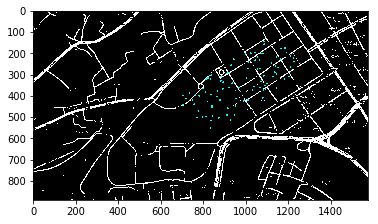

In [5]:
import random
# p = np.array([(673,472)])
# points

# for i in range(LENGTH_PIX):
#     for j in range(WIDTH_PIX):
#         p = np.array([(LENGTH_PIX - i,j)])#the y is opisite
#         if(points_path.contains_points(p)):
#             res[i,j] = [20, 200, 200]
# cv2.imwrite('/home/james/Program/opencv_image_range.png', res)
# plt.imshow(res)

#take out max_x, max_y
rec = []
for i in points_nparray.T: 
    rec += [[min(i),max(i)]]

#randomly choose trainingset    
trainingset = []
while len(trainingset) != 100:
    #Add random element in rectangle 
    random_element = [random.randrange(list(x for x in rec[0])[0], 
                                        list(x for x in rec[0])[1]),
                     random.randrange(list(x for x in rec[1])[0], 
                                        list(x for x in rec[1])[1])]

    if points_path.contains_points(np.array([random_element])):
        trainingset.append(random_element) 

for x in trainingset:
    cv2.circle(res,(x[1],LENGTH_PIX - x[0]),1,list([0, 255, 255]),5)
       
plt.imshow(res)

# cv2.imshow('opencv_image',res)
# cv2.imwrite('/home/james/Program/opencv_image_range.png', res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [11]:
random_element

[523, 799]

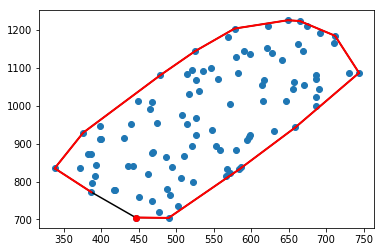

In [6]:
from scipy.spatial import ConvexHull

trainingset = np.array(trainingset)#must be np array
plt.plot(trainingset[:,0], trainingset[:,1], 'o')

hull = ConvexHull(trainingset)
for simplex in hull.simplices:
    plt.plot(trainingset[simplex,0], trainingset[simplex, 1], 'k-')
    
plt.plot(trainingset[hull.vertices,0], trainingset[hull.vertices,1], 'r-', lw=2)
plt.plot(trainingset[hull.vertices[0],0], trainingset[hull.vertices[0],1], 'ro')
plt.show()

